# Feature Transformation and Selection

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load all sheets from the Excel file
file_path = '../data/DataScientist_CaseStudy_Dataset.xlsx'

# Load sheets
soc_dem = pd.read_excel(file_path, sheet_name='Soc_Dem')
print(f"Shape of soc_dem: {soc_dem.shape}")
products = pd.read_excel(file_path, sheet_name='Products_ActBalance')
print(f"Shape of products: {products.shape}")
inflow_outflow = pd.read_excel(file_path, sheet_name='Inflow_Outflow')
print(f"Shape of inflow_outflow: {inflow_outflow.shape}")
sales_revenue = pd.read_excel(file_path, sheet_name='Sales_Revenues')
print(f"Shape of sales_revenue: {sales_revenue.shape}")
df = sales_revenue.merge(products, on='Client', how='left')\
            .merge(inflow_outflow, on='Client', how='left')\
               .merge(soc_dem, on='Client', how='left')

print(df.shape)
print("Duplicated: ", df.duplicated(subset= "Client").sum())
label_col = ['Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC', 'Revenue_CL']
feature_col = [col for col in df.columns if col not in label_col + ['Client']]

df.head()


Shape of soc_dem: (1615, 4)
Shape of products: (1615, 13)
Shape of inflow_outflow: (1587, 15)
Shape of sales_revenue: (969, 7)
(969, 36)
Duplicated:  0


,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Count_CA,Count_SA,Count_MF,...,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sex,Age,Tenure
0,1094,0,1,0,0.000000,5.138571,0.0000,1,NaN,NaN,...,351.950357,891.327857,31.0,31.0,1.0,21.0,4.0,M,25,8
1,1484,1,0,1,25.609107,0.000000,8.7225,1,NaN,NaN,...,302.446429,357.785714,23.0,23.0,1.0,16.0,5.0,M,39,0
2,20,0,1,0,0.000000,3.822500,0.0000,1,1.0,NaN,...,10.714286,103.571429,7.0,7.0,3.0,1.0,3.0,M,27,181
3,1193,0,0,0,0.000000,0.000000,0.0000,2,NaN,NaN,...,331.150000,75.178571,55.0,36.0,6.0,21.0,2.0,M,48,16
4,142,0,0,0,0.000000,0.000000,0.0000,1,NaN,NaN,...,0.000000,725.928571,2.0,2.0,0.0,0.0,1.0,F,27,183


In [3]:
df["ActBal_CC"].describe()

count     110.000000
mean      280.908494
std       376.194964
min       -15.479286
25%         0.767857
50%        37.125000
75%       491.310179
max      1767.785357
Name: ActBal_CC, dtype: float64

In [4]:
feature_col

['Count_CA',
 'Count_SA',
 'Count_MF',
 'Count_OVD',
 'Count_CC',
 'Count_CL',
 'ActBal_CA',
 'ActBal_SA',
 'ActBal_MF',
 'ActBal_OVD',
 'ActBal_CC',
 'ActBal_CL',
 'VolumeCred',
 'VolumeCred_CA',
 'TransactionsCred',
 'TransactionsCred_CA',
 'VolumeDeb',
 'VolumeDeb_CA',
 'VolumeDebCash_Card',
 'VolumeDebCashless_Card',
 'VolumeDeb_PaymentOrder',
 'TransactionsDeb',
 'TransactionsDeb_CA',
 'TransactionsDebCash_Card',
 'TransactionsDebCashless_Card',
 'TransactionsDeb_PaymentOrder',
 'Sex',
 'Age',
 'Tenure']

In [5]:
# Fill missing
col_exclude = 'Sex'

df[df.columns.difference([col_exclude])] = df[df.columns.difference([col_exclude])].fillna(0)
df = df.dropna() # Dropna
df.isnull().sum()

Client                          0
Sale_MF                         0
Sale_CC                         0
Sale_CL                         0
Revenue_MF                      0
Revenue_CC                      0
Revenue_CL                      0
Count_CA                        0
Count_SA                        0
Count_MF                        0
Count_OVD                       0
Count_CC                        0
Count_CL                        0
ActBal_CA                       0
ActBal_SA                       0
ActBal_MF                       0
ActBal_OVD                      0
ActBal_CC                       0
ActBal_CL                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
TransactionsDe

In [6]:
# Filter erroneous tenure
print(f"Pre-filtered shape: {len(df)}")
df =  df[df['Tenure']/12 <= df['Age']]
print(f"Post-filtered shape: {len(df)}")

Pre-filtered shape: 967
Post-filtered shape: 933


In [7]:
# Create Dummy Columns
dummies = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True).astype(int)
df = df.drop('Sex', axis=1).join(dummies)

In [8]:
df[df.isna().any(axis=1)]

,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Count_CA,Count_SA,Count_MF,...,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Age,Tenure,Sex_M


In [9]:
# Log transform
col_to_transform = [col for col in df.columns if (col.startswith('Volume') or col.startswith('Transactions'))]
df[col_to_transform] = df[col_to_transform].apply(lambda x: np.log1p(x))
df.describe()

,Client,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,Count_CA,Count_SA,Count_MF,...,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Age,Tenure,Sex_M
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,...,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,809.939979,0.202572,0.250804,0.286174,1.984476,2.783249,3.388565,1.077170,0.319400,0.926045,...,2.751526,4.164421,2.357480,2.247337,0.790142,1.117071,1.280376,44.314041,98.518757,0.535906
std,463.643784,0.402132,0.433708,0.452214,10.123181,18.021070,7.554915,0.328287,0.577492,4.124133,...,2.627080,2.804534,1.082752,1.030170,0.759141,1.177716,0.971236,17.526956,64.766458,0.498977
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,420.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.609438,1.609438,0.000000,0.000000,0.000000,30.000000,40.000000,0.000000
50%,810.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.241476,5.162539,2.564949,2.397895,0.693147,0.693147,1.386294,42.000000,92.000000,1.000000
75%,1212.000000,0.000000,1.000000,1.000000,0.000000,0.071429,4.214286,1.000000,1.000000,0.000000,...,5.200303,6.196953,3.135494,2.995732,1.386294,2.079442,2.079442,58.000000,151.000000,1.000000
max,1613.000000,1.000000,1.000000,1.000000,220.488214,407.962500,133.275357,4.000000,3.000000,79.000000,...,8.199359,11.034181,4.634729,4.430817,3.258097,4.110874,3.555348,90.000000,271.000000,1.000000


# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

def split_df(df, label_cols, test_size=0.1, val_size=0.1, random_state=None, shuffle=True):
    """
    Split a DataFrame into train, validation, and test sets with stratification
    based on the combination of multiple label columns.

    Parameters:
    - df: pandas DataFrame
    - label_cols: list of str, column names for labels (for stratification)
    - test_size: float, fraction of data for test set (default 0.2)
    - val_size: float, fraction of data for validation set (default 0.1)
    - random_state: int or None, for reproducibility
    - shuffle: bool, whether to shuffle before splitting (default True)

    Returns:
    - X_train, X_val, X_test, y_train, y_val, y_test as DataFrames
    """
    if not isinstance(label_cols, list):
        raise ValueError("label_cols must be a list of column names")

    # Create stratification key by combining label columns as a tuple of string
    stratify_key = df[label_cols].astype(str).agg('_'.join, axis=1)

    X = df.drop(columns=label_cols)
    y = df[label_cols]

    # First split: train+val and test with stratification
    X_train_val, X_test, y_train_val, y_test, strat_train_val, strat_test = train_test_split(
        X, y, stratify_key, test_size=test_size, random_state=random_state, shuffle=shuffle
    )

    # Adjust val_size relative to remaining train_val set
    val_adjusted = val_size / (1 - test_size)

    # Second split: train and val with stratification
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_adjusted,
        stratify=strat_train_val,
        random_state=random_state, shuffle=shuffle
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_df(
    df, label_cols=['Sale_MF', 'Sale_CC', 'Sale_CL'], test_size=0.1, val_size=0.1, random_state=42
)
print(X_train.shape, X_test.shape, X_val.shape)
X_train.head()

(745, 33) (94, 33) (94, 33)


,Client,Revenue_MF,Revenue_CC,Revenue_CL,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Age,Tenure,Sex_M
194,721,0.0,4.464286,0.000000,1,1.0,0.0,1.0,0.0,0.0,...,5.030134,6.703035,2.890372,2.890372,0.693147,1.609438,2.484907,67,82,0
120,1456,0.0,3.607143,0.000000,1,1.0,0.0,0.0,0.0,0.0,...,6.211492,5.559169,3.367296,3.367296,0.693147,3.044522,1.791759,61,149,0
859,1579,0.0,0.000000,4.388929,1,1.0,3.0,0.0,0.0,0.0,...,6.819962,6.669770,3.258097,3.258097,1.791759,2.397895,2.197225,50,0,1
705,1272,0.0,0.000000,0.000000,1,0.0,1.0,0.0,0.0,0.0,...,5.667504,6.830141,2.944439,2.944439,1.386294,1.609438,2.302585,35,96,1
762,123,0.0,0.000000,10.461071,2,0.0,0.0,0.0,0.0,0.0,...,3.553305,0.000000,1.098612,1.098612,0.000000,0.693147,0.000000,22,40,0


In [11]:
from sklearn.preprocessing import StandardScaler

col_trans = [col for col in X_train.columns if col.startswith('Act')]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_val_scaled = X_val.copy()

# Fit scaler on X_train only 
scaler.fit(X_train_scaled[col_trans])

# Transform all sets with the fitted scaler
X_train_scaled[col_trans] = scaler.transform(X_train_scaled[col_trans])
X_test_scaled[col_trans] = scaler.transform(X_test_scaled[col_trans])
X_val_scaled[col_trans] = scaler.transform(X_val_scaled[col_trans])
X_train_scaled[col_trans]

,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
194,-0.374023,1.237147,-0.128290,3.170964,-0.199778,-0.197907
120,-0.409403,-0.208348,-0.128290,-0.225288,-0.199778,-0.197907
859,-0.340294,0.236943,-0.128290,-0.225288,-0.199778,-0.197907
705,0.526686,-0.208348,0.101744,-0.225288,-0.199778,-0.197907
762,1.027840,-0.208348,-0.128290,-0.225288,-0.199778,-0.197907
...,...,...,...,...,...,...
827,-0.403149,-0.208348,-0.128290,-0.225288,-0.199778,-0.197907
799,1.073454,-0.208348,-0.128290,4.308952,-0.199778,-0.197907
589,-0.368576,-0.208348,-0.128290,-0.225288,-0.199778,0.001056
222,4.733903,0.445606,-0.128290,-0.225288,-0.199778,-0.197907


# Modelling and Analysis

In [ ]:
import numpy as np
import pandas as pd
import yaml
from typing import List, Optional, Dict, Any, Union
from pydantic import BaseModel, Field
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    f1_score, precision_score, recall_score, roc_auc_score, roc_curve,  brier_score_loss
)
from sklearn.calibration import calibration_curve

from sklearn.model_selection import GridSearchCV
import wandb
import warnings
import os
import joblib
import itertools
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

class ModelHyperparams(BaseModel):
    random_forest: dict = Field(default_factory=dict)
    xgboost: dict = Field(default_factory=dict)


class WandbConfig(BaseModel):
    project_name: str
    run_name: str = None
    hyperparameters: ModelHyperparams


def load_wandb_config(yaml_path: str) -> WandbConfig:
    with open(yaml_path, "r") as f:
        cfg = yaml.safe_load(f)
    return WandbConfig.parse_obj(cfg)


class ClassifierTrainer:
    def __init__(
        self,
        model_name: str,
        config: ModelHyperparams,
        feature_cols: List[str],
        label_col: str,
        wandb_config: WandbConfig,
    ):
        self.model_name = model_name
        self.config = config
        self.feature_cols = feature_cols
        self.label_col = label_col
        self.best_threshold = 0.5
        self.model = self._init_model()

        self.wandb_run = wandb.init(
            project=wandb_config.project_name,
            name=wandb_config.run_name,
            config=config.dict(),
        )
        wandb.config.update({"model_name": model_name})

    def _init_model(self):
        if self.model_name == "random_forest":
            return RandomForestClassifier(random_state=42)
        elif self.model_name == "xgboost":
            return XGBClassifier(
                use_label_encoder=False,
                eval_metric="logloss",
                random_state=42,
                n_estimators=80,
                learning_rate=0.001,
            )
        else:
            raise ValueError(f"Unsupported model_name: {self.model_name}")
    def top_15_metrics(self, probs: np.ndarray, y_true: Union[pd.Series, np.ndarray]) -> tuple:
        top_k_percent = 0.15
        n_top = int(len(probs) * top_k_percent)
        sorted_indices = probs.argsort()[::-1]

        top_indices = sorted_indices[:n_top]
        if isinstance(y_true, pd.Series):
            top_y = y_true.iloc[top_indices].values
            total_positives = y_true.sum()
        else:
            top_y = y_true[top_indices]
            total_positives = y_true.sum()

        positives_in_top = top_y.sum()
        top15_precision = positives_in_top / n_top if n_top > 0 else 0.0
        top15_recall = positives_in_top / total_positives if total_positives > 0 else 0.0
        baseline_positive_rate = total_positives / len(y_true) if len(y_true) > 0 else 0.0
        lift = (top15_precision / baseline_positive_rate) if baseline_positive_rate > 0 else 0.0
        return top15_precision, top15_recall, lift

    def expected_calibration_error(self, y_true, probs, n_bins=10):
        prob_true, prob_pred = calibration_curve(y_true, probs, n_bins=n_bins, strategy='uniform')

        # Create uniform bin edges between 0 and 1 (same as calibration_curve)
        bin_edges = np.linspace(0, 1, n_bins + 1)
        
        # Find bin index for each probability
        bin_indices = np.digitize(probs, bins=bin_edges, right=True) - 1

        # Get unique bins where samples actually fall
        unique_bins = np.unique(bin_indices)
        
        # Count samples per unique bin (these correspond to prob_true and prob_pred)
        bin_counts = np.array([np.sum(bin_indices == b) for b in unique_bins])

        # Normalize weights to sum to 1
        weights = bin_counts / bin_counts.sum() if bin_counts.sum() > 0 else np.ones_like(bin_counts) / len(bin_counts)

        # Calculate weighted average of calibration error
        ece = np.sum(weights * np.abs(prob_true - prob_pred))

        return float(ece)
    
    def compute_all_metrics(self, y_true: Union[pd.Series, np.ndarray], probs: np.ndarray) -> Dict[str, float]:
        preds = (probs >= self.best_threshold).astype(int)

        f1 = f1_score(y_true, preds)
        precision = precision_score(y_true, preds, zero_division=0)
        recall = recall_score(y_true, preds)
        auc = roc_auc_score(y_true, probs)
        brier = brier_score_loss(y_true, probs)
        ece = self.expected_calibration_error(y_true, probs)
        top15_precision, top15_recall, top15_lift = self.top_15_metrics(probs, y_true)

        return {
            "f1": f1,
            "precision": precision,
            "recall": recall,
            "auc": auc,
            "brier": brier,
            "ece": ece,
            "top15_precision": top15_precision,
            "top15_recall": top15_recall,
            "top15_lift": top15_lift,
        }

    def tune_hyperparameters(
        self,
        X_train: pd.DataFrame,
        y_train: Union[pd.Series, np.ndarray],
        X_val: pd.DataFrame,
        y_val: Union[pd.Series, np.ndarray],
    ):
        X_train_filtered = X_train[self.feature_cols]
        X_val_filtered = X_val[self.feature_cols]
        y_train = y_train[self.label_col]
        y_val = y_val[self.label_col]

        param_grid = getattr(self.config, self.model_name, {})
        if not param_grid:
            raise ValueError(f"No hyperparameter grid provided for {self.model_name}.")

        best_f1 = -1
        best_params = None
        best_model = None
        best_threshold = 0.5

        keys, values = zip(*param_grid.items())
        for v in itertools.product(*values):
            params = dict(zip(keys, v))
            model = self.model.__class__(**params)
            model.fit(X_train_filtered, y_train)

            val_probs = model.predict_proba(X_val_filtered)[:, 1]
            threshold = self._tune_threshold(np.array(y_val), val_probs)
            val_preds = (val_probs >= threshold).astype(int)

            f1 = f1_score(y_val, val_preds)
            if f1 > best_f1:
                best_f1 = f1
                best_params = params
                best_model = model
                best_threshold = threshold

        # Save best model and threshold
        self.model = best_model
        self.best_threshold = best_threshold

        print(f"\nBest hyperparameters for {self.model_name}: {best_params}")
        print(f"Best threshold tuned on validation set: {best_threshold:.3f}")
        print(f"Best validation F1: {best_f1:.4f}\n")

        # Compute metrics on train and val
        train_probs = best_model.predict_proba(X_train_filtered)[:, 1]
        val_probs = best_model.predict_proba(X_val_filtered)[:, 1]

        train_metrics = self.compute_all_metrics(y_train, train_probs)
        val_metrics = self.compute_all_metrics(y_val, val_probs)

        print("Metrics using Best Model BEFORE Retraining:")
        print(f"Train F1: {train_metrics['f1']:.4f} | Precision: {train_metrics['precision']:.4f} | Recall: {train_metrics['recall']:.4f} | ROC AUC: {train_metrics['auc']:.4f}")
        print(f"Train Brier: {train_metrics['brier']:.4f} | ECE: {train_metrics['ece']:.4f}")
        print(f"Train Top15% Precision: {train_metrics['top15_precision']:.4f} | Recall: {train_metrics['top15_recall']:.4f} | Lift: {train_metrics['top15_lift']:.4f}")

        print(f"Val   F1: {val_metrics['f1']:.4f} | Precision: {val_metrics['precision']:.4f} | Recall: {val_metrics['recall']:.4f} | ROC AUC: {val_metrics['auc']:.4f}")
        print(f"Val   Brier: {val_metrics['brier']:.4f} | ECE: {val_metrics['ece']:.4f}")
        print(f"Val   Top15% Precision: {val_metrics['top15_precision']:.4f} | Recall: {val_metrics['top15_recall']:.4f} | Lift: {val_metrics['top15_lift']:.4f}\n")

        wandb.log({
            "best_hyperparameters": best_params,
            "best_threshold": self.best_threshold,
            **{f"train_{k}": v for k, v in train_metrics.items()},
            **{f"val_{k}": v for k, v in val_metrics.items()},
        })

        # Retrain on combined
        X_combined = pd.concat([X_train_filtered, X_val_filtered], axis=0)
        y_combined = pd.concat([y_train, y_val], axis=0)

        final_model = self.model.__class__(**best_params)
        final_model.fit(X_combined, y_combined)
        self.model = final_model
    def _tune_threshold(self, y_true: np.ndarray, y_probs: np.ndarray) -> float:
        thresholds = np.linspace(0.1, 0.9, 81)
        f1_scores = [(f1_score(y_true, (y_probs >= t).astype(int))) for t in thresholds]
        return thresholds[np.argmax(f1_scores)]
    def evaluate(
        self,
        X_test: pd.DataFrame,
        y_test: Union[pd.Series, np.ndarray],
    ) -> dict:

        X_test_filtered = X_test[self.feature_cols]
        y_test = y_test[self.label_col]

        probs = self.model.predict_proba(X_test_filtered)[:, 1]
        preds = (probs >= self.best_threshold).astype(int)

        metrics = {
            "f1": f1_score(y_test, preds),
            "precision": precision_score(y_test, preds, zero_division=0),
            "recall": recall_score(y_test, preds),
            "auc": roc_auc_score(y_test, probs),
            "threshold": self.best_threshold,
        }

        # Top 15% targeting logic
        top_k_percent = 0.15
        n_top = int(len(probs) * top_k_percent)
        sorted_indices = probs.argsort()[::-1]

        top_indices = sorted_indices[:n_top]
        top_y = y_test.iloc[top_indices].values

        positives_in_top = top_y.sum()
        total_positives = y_test.sum()

        top15_precision = positives_in_top / n_top if n_top > 0 else 0
        top15_recall = positives_in_top / total_positives if total_positives > 0 else 0
        baseline_positive_rate = total_positives / len(y_test) if len(y_test) > 0 else 0
        lift = (top15_precision / baseline_positive_rate) if baseline_positive_rate > 0 else 0

        metrics.update({
            "top15_precision": top15_precision,
            "top15_recall": top15_recall,
            "top15_lift": lift,
        })

        # Calibration metrics
        brier = brier_score_loss(y_test, probs)
        prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=10, strategy='uniform')
        # Compute bin edges and which bin each prob falls into
        bin_edges = np.linspace(0, 1, 11)  # 10 bins → 11 edges
        bin_indices = np.digitize(probs, bins=bin_edges, right=True) - 1

        # Filter to only bins that exist in calibration output
        unique_bins = np.unique(bin_indices)
        bin_counts = np.array([np.sum(bin_indices == b) for b in unique_bins])

        # Compute weights for non-empty bins (same length as prob_true/prob_pred)
        weights = bin_counts / bin_counts.sum() if bin_counts.sum() > 0 else np.ones_like(bin_counts) / len(bin_counts)

        # Expected Calibration Error (ECE)
        ece = np.sum(weights * np.abs(prob_true - prob_pred))
        metrics.update({
            "brier_score": brier,
            "expected_calibration_error": ece,
        })

        # ROC Curve plotting
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        auc_score = metrics["auc"]

        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.grid()

        # Save plot to file if needed
        plt.savefig("roc_curve.png", bbox_inches="tight")
        plt.show()

        # Optionally log to wandb
        wandb.log({"roc_curve": wandb.Image("roc_curve.png")})
        wandb.log(metrics)

        print("\nEvaluation Metrics:")
        for k, v in metrics.items():
            print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

        return metrics
    def predict(
        self,
        X: pd.DataFrame,
    ) -> (np.ndarray, np.ndarray):
        X_filtered = X[self.feature_cols]
        probs = self.model.predict_proba(X_filtered)[:, 1]
        preds = (probs >= self.best_threshold).astype(int)
        return preds, probs
    
    def save_model(self, output_folder: str):
        os.makedirs(output_folder, exist_ok=True)
        
        model_path = os.path.join(output_folder, f"{self.model_name}_model.joblib")
        threshold_path = os.path.join(output_folder, f"{self.model_name}_threshold.txt")
        
        # Save the model
        joblib.dump(self.model, model_path)
        
        # Save the threshold as a text file
        with open(threshold_path, "w") as f:
            f.write(str(self.best_threshold))
        
        print(f"Model saved to {model_path}")
        print(f"Threshold saved to {threshold_path}")

    def close(self):
        wandb.finish()

In [33]:
def analyze_feature_importance(
    model,
    X_test: Union[pd.DataFrame, np.ndarray],
    feature_names: Optional[List[str]] = None,
    top_n: Optional[int] = None,
    plot: bool = True,
) -> pd.DataFrame:
    """
    Analyze and rank feature importance for Random Forest or XGBoost.

    Parameters:
    - model: Trained model (RandomForestClassifier or XGBClassifier)
    - X_test: Test dataset features (DataFrame or array)
    - feature_names: Optional list of feature names (if X_test is array)
    - top_n: Show top N most relevant features (None = show all)
    - plot: Whether to show bar plot of feature importance

    Returns:
    - Pandas DataFrame with columns: ["feature", "importance"], sorted descending
    """

    import matplotlib.pyplot as plt
    import seaborn as sns
    X_test = X_test[feature_names]
    if feature_names is None:
        if isinstance(X_test, pd.DataFrame):
            feature_names = X_test.columns.tolist()
        else:
            raise ValueError("Provide feature_names if X_test is not a DataFrame")

    # Get importance scores
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    elif hasattr(model, "get_booster"):
        importance_dict = model.get_booster().get_score(importance_type="gain")
        importance = np.array(
            [importance_dict.get(f"f{i}", 0.0) for i in range(len(feature_names))]
        )
    else:
        raise ValueError("Model does not provide feature importance")

    importance_df = (
        pd.DataFrame({"feature": feature_names, "importance": importance})
        .sort_values(by="importance", ascending=False)
        .reset_index(drop=True)
    )

    if top_n:
        importance_df = importance_df.head(top_n)

    if plot:
        plt.figure(figsize=(10, max(4, 0.4 * len(importance_df))))
        sns.barplot(x="importance", y="feature", data=importance_df, palette="viridis")
        plt.title("Feature Importance (Most to Least Relevant)")
        plt.show()

    return importance_df

In [34]:
from typing import List, Optional
from pydantic import BaseModel, Field
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib
import os

class PCATransformer(BaseModel):
    cat_columns: List[str] = Field(default_factory=list)
    variance_threshold: float = 0.99995
    pca: Optional[PCA] = None
    scaler: Optional[StandardScaler] = None
    non_cat_columns_: Optional[List[str]] = None

    model_config = {"arbitrary_types_allowed": True}

    def fit(self, df: pd.DataFrame):
        # Identify non-categorical columns
        self.non_cat_columns_ = [col for col in df.columns if col not in self.cat_columns]
        numeric_data = df[self.non_cat_columns_].select_dtypes(include=[np.number])

        # Fit scaler
        self.scaler = StandardScaler()
        numeric_data_scaled = self.scaler.fit_transform(numeric_data)

        # Fit PCA with full components first
        pca_full = PCA(n_components=min(numeric_data_scaled.shape))
        pca_full.fit(numeric_data_scaled)

        # Determine number of components to meet variance threshold
        cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
        n_components = np.searchsorted(cumulative_variance, self.variance_threshold) + 1

        # Fit PCA again with reduced components
        self.pca = PCA(n_components=n_components)
        self.pca.fit(numeric_data_scaled)
        return self

    def transform(self, df: pd.DataFrame) -> pd.DataFrame:
        if self.pca is None or self.scaler is None or self.non_cat_columns_ is None:
            raise RuntimeError("PCATransformer must be fitted before calling transform.")

        # Extract categorical and numeric columns
        cat_df = df[self.cat_columns].copy()
        numeric_df = df[self.non_cat_columns_].select_dtypes(include=[np.number]).copy()

        # Standardize numeric data
        numeric_data_scaled = self.scaler.transform(numeric_df)

        # Apply PCA transformation
        pca_components = self.pca.transform(numeric_data_scaled)

        # Create dataframe for PCA components
        pca_cols = [f"PC{i+1}" for i in range(pca_components.shape[1])]
        pca_df = pd.DataFrame(pca_components, columns=pca_cols, index=df.index)

        # Combine categorical and PCA-transformed columns
        transformed_df = pd.concat([cat_df, pca_df], axis=1)
        return transformed_df

    def fit_transform(self, df: pd.DataFrame) -> pd.DataFrame:
        return self.fit(df).transform(df)

    def save(self, path: str):
        os.makedirs(path, exist_ok=True)
        joblib.dump(self.scaler, os.path.join(path, "scaler.joblib"))
        joblib.dump(self.pca, os.path.join(path, "pca.joblib"))
        joblib.dump(self.cat_columns, os.path.join(path, "cat_columns.joblib"))
        joblib.dump(self.non_cat_columns_, os.path.join(path, "non_cat_columns.joblib"))

    def load(self, path: str):
        self.scaler = joblib.load(os.path.join(path, "scaler.joblib"))
        self.pca = joblib.load(os.path.join(path, "pca.joblib"))
        self.cat_columns = joblib.load(os.path.join(path, "cat_columns.joblib"))
        self.non_cat_columns_ = joblib.load(os.path.join(path, "non_cat_columns.joblib"))
        return self

In [ ]:
import os
from dotenv import load_dotenv
import wandb

# Load .env variables
load_dotenv()

wandb_api_key = os.getenv("WANDB_API_KEY")
if wandb_api_key:
    wandb.login(key=wandb_api_key)
else:
    raise EnvironmentError("WANDB_API_KEY not found in .env file")

wandb: ERROR Failed to detect the name of this notebook. You can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Ng Wei Xuan\_netrc
wandb: Currently logged in as: weixuan to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


## Sale_MF

In [23]:
print(X_train.columns)
feature_cols = ['ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC',
       'ActBal_CL', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Age', 'Tenure', 'Sex_M']  

# X_train_filtered = X_train[feature_cols]
# X_test_filtered = X_test[feature_cols]
# X_val_filtered = X_val[feature_cols]

# y_train_MF, y_test_MF, y_val_MF = y_train["Sale_MF"], y_test["Sale_MF"], y_val["Sale_MF"]
# y_train_CC, y_test_CC, y_val_CC = y_train["Sale_CC"], y_test["Sale_CC"], y_val["Sale_CC"]
# y_train_CL, y_test_CL, y_val_CL = y_train["Sale_CL"], y_test["Sale_CL"], y_val["Sale_CL"]  

Index(['Client', 'Revenue_MF', 'Revenue_CC', 'Revenue_CL', 'Count_CA',
       'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'Count_CL',
       'ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_OVD', 'ActBal_CC',
       'ActBal_CL', 'VolumeCred', 'VolumeCred_CA', 'TransactionsCred',
       'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Age', 'Tenure', 'Sex_M'],
      dtype='object')


In [ ]:
wandb_cfg = load_wandb_config("../src/configs/config.yaml")
wandb_cfg.run_name = "sale_mf_rf"

best_threshold,▁
train_auc,▁
train_brier,▁
train_ece,▁
train_f1,▁
train_precision,▁
train_recall,▁
train_top15_lift,▁
train_top15_precision,▁
train_top15_recall,▁
val_auc,▁



Best hyperparameters for random_forest: {'max_depth': 3, 'min_samples_split': 5}
Best threshold tuned on validation set: 0.220
Best validation F1: 0.4737

Metrics using Best Model BEFORE Retraining:
Train F1: 0.4836 | Precision: 0.5900 | Recall: 0.4097 | ROC AUC: 0.8017
Train Brier: 0.1393 | ECE: 0.0727
Train Top15% Precision: 0.5676 | Recall: 0.4375 | Lift: 2.9364
Val   F1: 0.4737 | Precision: 0.4500 | Recall: 0.5000 | ROC AUC: 0.6689
Val   Brier: 0.1465 | ECE: 0.0442
Val   Top15% Precision: 0.4286 | Recall: 0.3333 | Lift: 2.2381



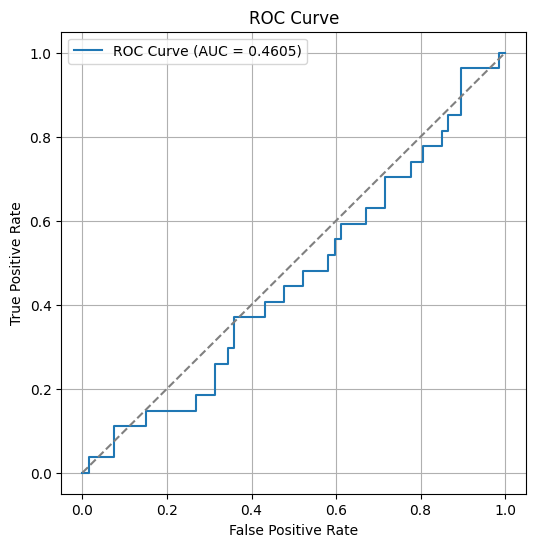


Evaluation Metrics:
f1: 0.1778
precision: 0.2222
recall: 0.1481
auc: 0.4605
threshold: 0.2200
top15_precision: 0.2857
top15_recall: 0.1481
top15_lift: 0.9947
brier_score: 0.2181
expected_calibration_error: 0.1117
Test Metrics: {'f1': 0.17777777777777778, 'precision': 0.2222222222222222, 'recall': 0.14814814814814814, 'auc': 0.46047540077390825, 'threshold': 0.22, 'top15_precision': 0.2857142857142857, 'top15_recall': 0.14814814814814814, 'top15_lift': 0.9947089947089945, 'brier_score': 0.2180628032123257, 'expected_calibration_error': 0.11173926495341592}
Model saved to model/sale_mf/rf/random_forest_model.joblib
Threshold saved to model/sale_mf/rf/random_forest_threshold.txt


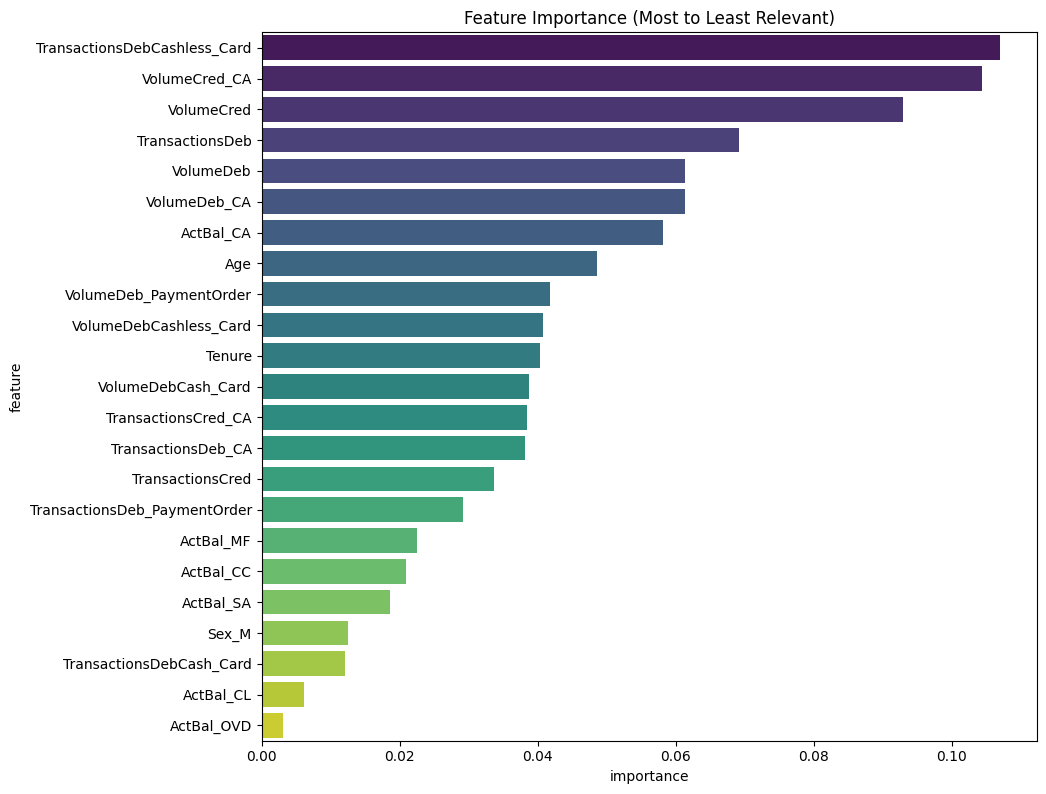

                         feature  importance
0   TransactionsDebCashless_Card    0.106935
1                  VolumeCred_CA    0.104362
2                     VolumeCred    0.092896
3                TransactionsDeb    0.069246
4                      VolumeDeb    0.061411
5                   VolumeDeb_CA    0.061385
6                      ActBal_CA    0.058226
7                            Age    0.048633
8         VolumeDeb_PaymentOrder    0.041794
9         VolumeDebCashless_Card    0.040817
10                        Tenure    0.040328
11            VolumeDebCash_Card    0.038718
12           TransactionsCred_CA    0.038512
13            TransactionsDeb_CA    0.038203
14              TransactionsCred    0.033728
15  TransactionsDeb_PaymentOrder    0.029135
16                     ActBal_MF    0.022513
17                     ActBal_CC    0.020872
18                     ActBal_SA    0.018618
19                         Sex_M    0.012464
20      TransactionsDebCash_Card    0.012063
21        

auc,▁
best_threshold,▁
brier_score,▁
expected_calibration_error,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁


In [35]:
# Initialize trainer
trainer = ClassifierTrainer(
    model_name="random_forest",
    config=wandb_cfg.hyperparameters,
    feature_cols=feature_cols,
    label_col = "Sale_MF",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_scaled, y_train, X_val_scaled, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_scaled, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_mf/rf/")

feature_importance = analyze_feature_importance(
    trainer.model,
    X_test_scaled,
    feature_cols
)
print(feature_importance)

# Close wandb run
trainer.close()


Best hyperparameters for xgboost: {'max_depth': 10, 'min_child_weight': 1}
Best threshold tuned on validation set: 0.370
Best validation F1: 0.4848

Metrics using Best Model BEFORE Retraining:
Train F1: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | ROC AUC: 1.0000
Train Brier: 0.0008 | ECE: 0.0179
Train Top15% Precision: 1.0000 | Recall: 0.7708 | Lift: 5.1736
Val   F1: 0.4848 | Precision: 0.5333 | Recall: 0.4444 | ROC AUC: 0.6630
Val   Brier: 0.1462 | ECE: 0.1336
Val   Top15% Precision: 0.5000 | Recall: 0.3889 | Lift: 2.6111



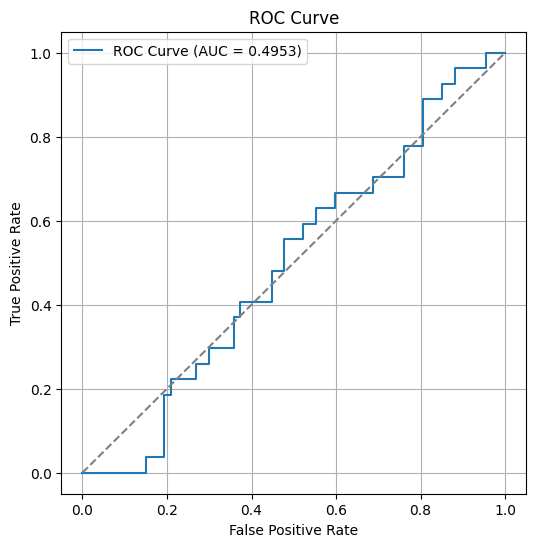


Evaluation Metrics:
f1: 0.0500
precision: 0.0769
recall: 0.0370
auc: 0.4953
threshold: 0.3700
top15_precision: 0.0714
top15_recall: 0.0370
top15_lift: 0.2487
brier_score: 0.3124
expected_calibration_error: 0.3189
Test Metrics: {'f1': 0.05, 'precision': 0.07692307692307693, 'recall': 0.037037037037037035, 'auc': 0.49530127142067437, 'threshold': 0.37, 'top15_precision': 0.07142857142857142, 'top15_recall': 0.037037037037037035, 'top15_lift': 0.24867724867724864, 'brier_score': 0.3123584886354502, 'expected_calibration_error': 0.3189060598094155}
Model saved to model/sale_mf/xgboost/xgboost_model.joblib
Threshold saved to model/sale_mf/xgboost/xgboost_threshold.txt


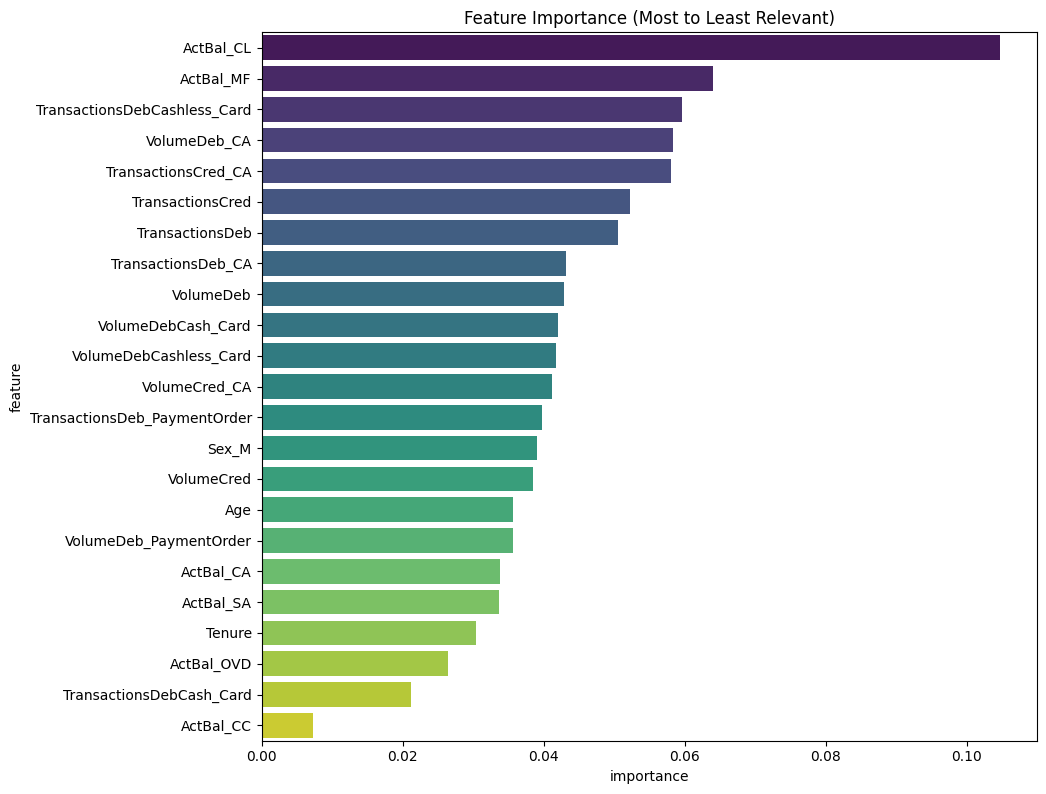

                         feature  importance
0                      ActBal_CL    0.104669
1                      ActBal_MF    0.064038
2   TransactionsDebCashless_Card    0.059561
3                   VolumeDeb_CA    0.058345
4            TransactionsCred_CA    0.058006
5               TransactionsCred    0.052274
6                TransactionsDeb    0.050508
7             TransactionsDeb_CA    0.043239
8                      VolumeDeb    0.042920
9             VolumeDebCash_Card    0.042006
10        VolumeDebCashless_Card    0.041811
11                 VolumeCred_CA    0.041221
12  TransactionsDeb_PaymentOrder    0.039823
13                         Sex_M    0.039097
14                    VolumeCred    0.038449
15                           Age    0.035647
16        VolumeDeb_PaymentOrder    0.035624
17                     ActBal_CA    0.033861
18                     ActBal_SA    0.033661
19                        Tenure    0.030348
20                    ActBal_OVD    0.026395
21      Tr

auc,▁
best_threshold,▁
brier_score,▁
expected_calibration_error,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁


In [ ]:
wandb_cfg = load_wandb_config("../src/configs/config.yaml")
wandb_cfg.run_name = "sale_mf_xgboost"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="xgboost",
    config=wandb_cfg.hyperparameters,
    feature_cols=feature_cols,
    label_col = "Sale_MF",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_scaled, y_train, X_val_scaled, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_scaled, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_mf/xgboost/")

feature_importance = analyze_feature_importance(
    trainer.model,
    X_test_scaled,
    feature_cols
)
print(feature_importance)

# Close wandb run
trainer.close()

In [ ]:
categorical_cols = ["Sex_M"]

pca_transformer = PCATransformer(cat_columns=categorical_cols)

X_train_pca = pca_transformer.fit_transform(X_train[feature_cols])

X_val_pca = pca_transformer.transform(X_val[feature_cols])
X_test_pca = pca_transformer.transform(X_test[feature_cols])
pca_transformer.save("model/pca/")


Best hyperparameters for random_forest: {'max_depth': 3, 'min_samples_split': 8}
Best threshold tuned on validation set: 0.160
Best validation F1: 0.3333

Metrics using Best Model BEFORE Retraining:
Train F1: 0.3812 | Precision: 0.2379 | Recall: 0.9583 | ROC AUC: 0.8123
Train Brier: 0.1387 | ECE: 0.1126
Train Top15% Precision: 0.5766 | Recall: 0.4444 | Lift: 2.9830
Val   F1: 0.3333 | Precision: 0.2083 | Recall: 0.8333 | ROC AUC: 0.5373
Val   Brier: 0.1569 | ECE: 0.0395
Val   Top15% Precision: 0.2857 | Recall: 0.2222 | Lift: 1.4921



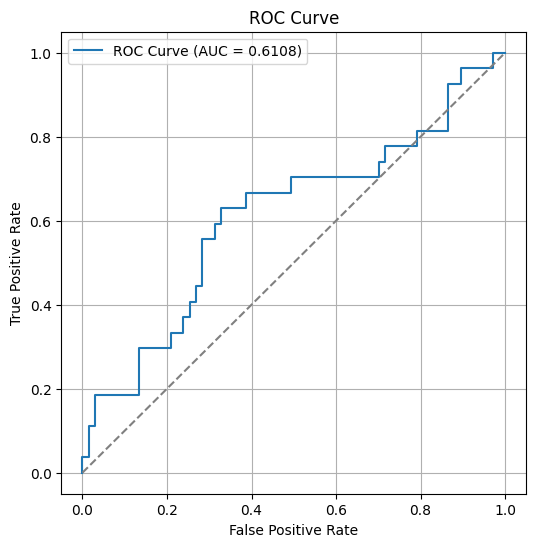


Evaluation Metrics:
f1: 0.4151
precision: 0.2785
recall: 0.8148
auc: 0.6108
threshold: 0.1600
top15_precision: 0.3571
top15_recall: 0.1852
top15_lift: 1.2434
brier_score: 0.2050
expected_calibration_error: 0.0887
Test Metrics: {'f1': 0.41509433962264153, 'precision': 0.27848101265822783, 'recall': 0.8148148148148148, 'auc': 0.6108347153123272, 'threshold': 0.16, 'top15_precision': 0.35714285714285715, 'top15_recall': 0.18518518518518517, 'top15_lift': 1.2433862433862433, 'brier_score': 0.2050470366506198, 'expected_calibration_error': 0.08870906888504626}
Model saved to model/sale_mf/rf/random_forest_model.joblib
Threshold saved to model/sale_mf/rf/random_forest_threshold.txt


auc,▁
best_threshold,▁
brier_score,▁
expected_calibration_error,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁


In [ ]:
wandb_cfg = load_wandb_config("../src/configs/config.yaml")
wandb_cfg.run_name = "sale_mf_rf_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="random_forest",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_MF",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_mf/rf/")


# Close wandb run
trainer.close()


Best hyperparameters for xgboost: {'max_depth': 3, 'min_child_weight': 3}
Best threshold tuned on validation set: 0.100
Best validation F1: 0.2951

Metrics using Best Model BEFORE Retraining:
Train F1: 0.7619 | Precision: 0.6154 | Recall: 1.0000 | ROC AUC: 1.0000
Train Brier: 0.0151 | ECE: 0.0849
Train Top15% Precision: 1.0000 | Recall: 0.7708 | Lift: 5.1736
Val   F1: 0.2951 | Precision: 0.2093 | Recall: 0.5000 | ROC AUC: 0.4803
Val   Brier: 0.2006 | ECE: 0.2004
Val   Top15% Precision: 0.2143 | Recall: 0.1667 | Lift: 1.1190



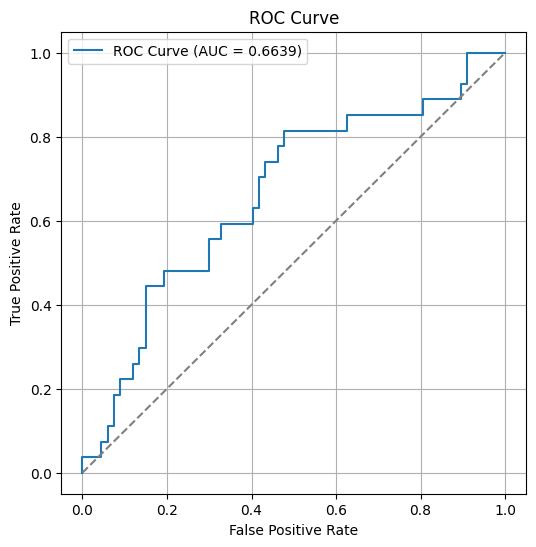


Evaluation Metrics:
f1: 0.4688
precision: 0.4054
recall: 0.5556
auc: 0.6639
threshold: 0.1000
top15_precision: 0.4286
top15_recall: 0.2222
top15_lift: 1.4921
brier_score: 0.2256
expected_calibration_error: 0.1754
Test Metrics: {'f1': 0.46875, 'precision': 0.40540540540540543, 'recall': 0.5555555555555556, 'auc': 0.6639027086788281, 'threshold': 0.1, 'top15_precision': 0.42857142857142855, 'top15_recall': 0.2222222222222222, 'top15_lift': 1.4920634920634919, 'brier_score': 0.22556221895503029, 'expected_calibration_error': 0.17543857527817497}
Model saved to model/sale_mf/xgboost/xgboost_model.joblib
Threshold saved to model/sale_mf/xgboost/xgboost_threshold.txt


auc,▁
best_threshold,▁
brier_score,▁
expected_calibration_error,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁


In [ ]:
wandb_cfg = load_wandb_config("../src/configs/config.yaml")
wandb_cfg.run_name = "sale_mf_xgboost_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="xgboost",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_MF",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_mf/xgboost/")


# Close wandb run
trainer.close()

## Sale_CC


Best hyperparameters for random_forest: {'max_depth': 7, 'min_samples_split': 5}
Best threshold tuned on validation set: 0.390
Best validation F1: 0.4118

Metrics using Best Model BEFORE Retraining:
Train F1: 0.7532 | Precision: 0.9915 | Recall: 0.6073 | ROC AUC: 0.9708
Train Brier: 0.1044 | ECE: 0.1788
Train Top15% Precision: 1.0000 | Recall: 0.5812 | Lift: 3.9005
Val   F1: 0.4118 | Precision: 0.6364 | Recall: 0.3043 | ROC AUC: 0.5628
Val   Brier: 0.1797 | ECE: 0.1149
Val   Top15% Precision: 0.5000 | Recall: 0.3043 | Lift: 2.0435



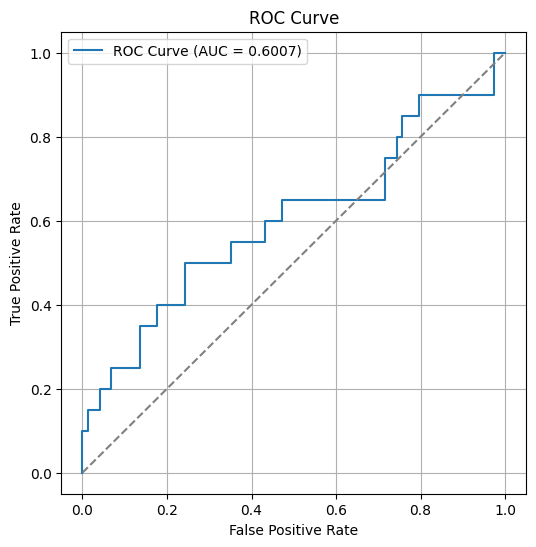


Evaluation Metrics:
f1: 0.2400
precision: 0.6000
recall: 0.1500
auc: 0.6007
threshold: 0.3900
top15_precision: 0.3571
top15_recall: 0.2500
top15_lift: 1.6786
brier_score: 0.1592
expected_calibration_error: 0.0780
Test Metrics: {'f1': 0.24, 'precision': 0.6, 'recall': 0.15, 'auc': 0.6006756756756757, 'threshold': 0.39, 'top15_precision': 0.35714285714285715, 'top15_recall': 0.25, 'top15_lift': 1.6785714285714286, 'brier_score': 0.15915978840501527, 'expected_calibration_error': 0.07800092359995027}
Model saved to model/sale_cc/rf/random_forest_model.joblib
Threshold saved to model/sale_cc/rf/random_forest_threshold.txt


auc,▁
best_threshold,▁
brier_score,▁
expected_calibration_error,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁


In [ ]:
wandb_cfg = load_wandb_config("../src/configs/config.yaml")
wandb_cfg.run_name = "sale_mf_cc_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="random_forest",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_CC",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_cc/rf/")


# Close wandb run
trainer.close()


Best hyperparameters for xgboost: {'max_depth': 3, 'min_child_weight': 8}
Best threshold tuned on validation set: 0.150
Best validation F1: 0.4935

Metrics using Best Model BEFORE Retraining:
Train F1: 0.7909 | Precision: 0.6541 | Recall: 1.0000 | ROC AUC: 0.9997
Train Brier: 0.0361 | ECE: 0.1305
Train Top15% Precision: 1.0000 | Recall: 0.5812 | Lift: 3.9005
Val   F1: 0.4935 | Precision: 0.3519 | Recall: 0.8261 | ROC AUC: 0.6381
Val   Brier: 0.1930 | ECE: 0.1056
Val   Top15% Precision: 0.4286 | Recall: 0.2609 | Lift: 1.7516



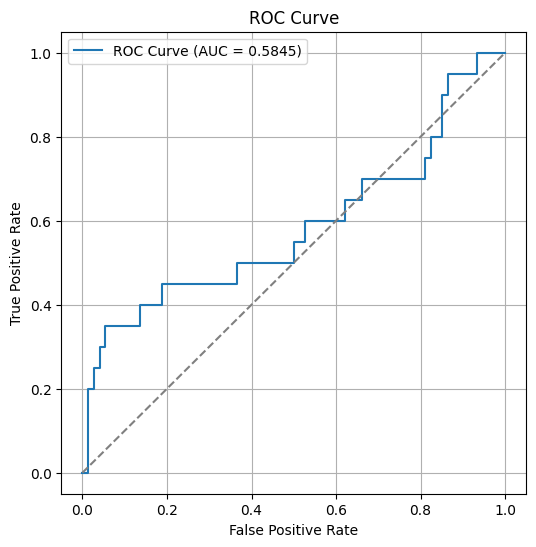


Evaluation Metrics:
f1: 0.3380
precision: 0.2353
recall: 0.6000
auc: 0.5845
threshold: 0.1500
top15_precision: 0.5000
top15_recall: 0.3500
top15_lift: 2.3500
brier_score: 0.1726
expected_calibration_error: 0.1407
Test Metrics: {'f1': 0.3380281690140845, 'precision': 0.23529411764705882, 'recall': 0.6, 'auc': 0.5844594594594594, 'threshold': 0.15000000000000002, 'top15_precision': 0.5, 'top15_recall': 0.35, 'top15_lift': 2.35, 'brier_score': 0.17257613053437468, 'expected_calibration_error': 0.14069207578382276}
Model saved to model/sale_cc/xgboost/xgboost_model.joblib
Threshold saved to model/sale_cc/xgboost/xgboost_threshold.txt


auc,▁
best_threshold,▁
brier_score,▁
expected_calibration_error,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁


In [ ]:
wandb_cfg = load_wandb_config("../src/configs/config.yaml")
wandb_cfg.run_name = "sale_cc_xgboost_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="xgboost",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_CC",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_cc/xgboost/")


# Close wandb run
trainer.close()

## CL


Best hyperparameters for random_forest: {'max_depth': 7, 'min_samples_split': 8}
Best threshold tuned on validation set: 0.280
Best validation F1: 0.5846

Metrics using Best Model BEFORE Retraining:
Train F1: 0.8426 | Precision: 0.7734 | Recall: 0.9252 | ROC AUC: 0.9710
Train Brier: 0.1206 | ECE: 0.2132
Train Top15% Precision: 1.0000 | Recall: 0.5187 | Lift: 3.4813
Val   F1: 0.5846 | Precision: 0.5000 | Recall: 0.7037 | ROC AUC: 0.7341
Val   Brier: 0.1788 | ECE: 0.0670
Val   Top15% Precision: 0.5000 | Recall: 0.2593 | Lift: 1.7407



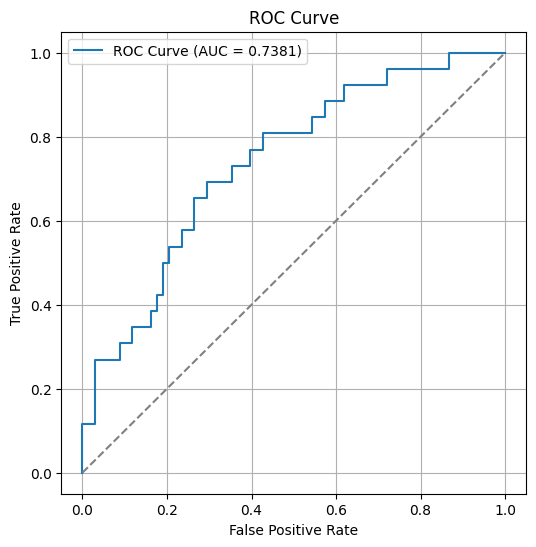


Evaluation Metrics:
f1: 0.5484
precision: 0.4722
recall: 0.6538
auc: 0.7381
threshold: 0.2800
top15_precision: 0.5714
top15_recall: 0.3077
top15_lift: 2.0659
brier_score: 0.1730
expected_calibration_error: 0.0502
Test Metrics: {'f1': 0.5483870967741935, 'precision': 0.4722222222222222, 'recall': 0.6538461538461539, 'auc': 0.7381221719457014, 'threshold': 0.28, 'top15_precision': 0.5714285714285714, 'top15_recall': 0.3076923076923077, 'top15_lift': 2.0659340659340657, 'brier_score': 0.17304631685178049, 'expected_calibration_error': 0.05016519386065969}
Model saved to model/sale_cl/rf/random_forest_model.joblib
Threshold saved to model/sale_cl/rf/random_forest_threshold.txt


auc,▁
best_threshold,▁
brier_score,▁
expected_calibration_error,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁


In [ ]:
wandb_cfg = load_wandb_config("../src/configs/config.yaml")
wandb_cfg.run_name = "sale_mf_cl_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="random_forest",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_CL",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_cl/rf/")


# Close wandb run
trainer.close()


Best hyperparameters for xgboost: {'max_depth': 10, 'min_child_weight': 1}
Best threshold tuned on validation set: 0.110
Best validation F1: 0.5833

Metrics using Best Model BEFORE Retraining:
Train F1: 1.0000 | Precision: 1.0000 | Recall: 1.0000 | ROC AUC: 1.0000
Train Brier: 0.0004 | ECE: 0.0152
Train Top15% Precision: 1.0000 | Recall: 0.5187 | Lift: 3.4813
Val   F1: 0.5833 | Precision: 0.4667 | Recall: 0.7778 | ROC AUC: 0.6882
Val   Brier: 0.2224 | ECE: 0.1642
Val   Top15% Precision: 0.4286 | Recall: 0.2222 | Lift: 1.4921



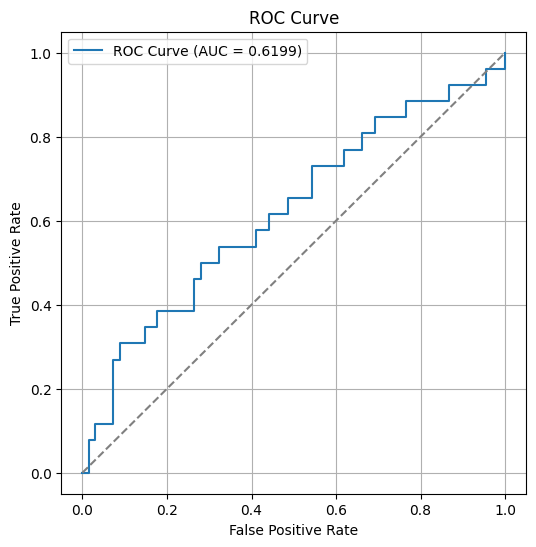


Evaluation Metrics:
f1: 0.4375
precision: 0.3684
recall: 0.5385
auc: 0.6199
threshold: 0.1100
top15_precision: 0.5714
top15_recall: 0.3077
top15_lift: 2.0659
brier_score: 0.2233
expected_calibration_error: 0.2019
Test Metrics: {'f1': 0.4375, 'precision': 0.3684210526315789, 'recall': 0.5384615384615384, 'auc': 0.6199095022624435, 'threshold': 0.11, 'top15_precision': 0.5714285714285714, 'top15_recall': 0.3076923076923077, 'top15_lift': 2.0659340659340657, 'brier_score': 0.22332953642723943, 'expected_calibration_error': 0.20190430167651277}
Model saved to model/sale_cl/xgboost/xgboost_model.joblib
Threshold saved to model/sale_cl/xgboost/xgboost_threshold.txt


auc,▁
best_threshold,▁
brier_score,▁
expected_calibration_error,▁
f1,▁
precision,▁
recall,▁
threshold,▁
top15_lift,▁
top15_precision,▁
top15_recall,▁


In [ ]:
wandb_cfg = load_wandb_config("../src/configs/config.yaml")
wandb_cfg.run_name = "sale_cl_xgboost_pca"

# Initialize trainer
trainer = ClassifierTrainer(
    model_name="xgboost",
    config=wandb_cfg.hyperparameters,
    feature_cols=X_train_pca.columns,
    label_col = "Sale_CL",
    wandb_config=wandb_cfg,
)

# Tune hyperparameters
trainer.tune_hyperparameters(X_train_pca, y_train, X_val_pca, y_val)

# Evaluate on test set
metrics = trainer.evaluate(X_test_pca, y_test)
print("Test Metrics:", metrics)

trainer.save_model("model/sale_cl/xgboost/")


# Close wandb run
trainer.close()

# Optimization

In [44]:
# Assume you know your categorical columns, e.g.:
categorical_cols = ["Sex_M"]

# Instantiate the transformer
pca_transformer = PCATransformer(cat_columns=categorical_cols)

# Fit PCA on training data and transform
pca_loaded = pca_transformer.load("model/pca/")

# Load all data
X = df[feature_cols]
X_transformed = pca_loaded.transform(X)
X_transformed.shape

(933, 23)

In [45]:
import joblib
import os
import pandas as pd
import numpy as np

class ModelPredictor:
    def __init__(self, model_name: str, model_folder: str, feature_cols: list):
        """
        Load saved model and threshold from the given folder.
        
        Args:
            model_name (str): Name of the model (e.g., "random_forest", "xgboost").
            model_folder (str): Folder path where model and threshold are saved.
            feature_cols (list): List of feature column names expected by the model.
        """
        self.model_name = model_name
        self.feature_cols = feature_cols
        
        model_path = os.path.join(model_folder, f"{model_name}_model.joblib")
        threshold_path = os.path.join(model_folder, f"{model_name}_threshold.txt")
        
        if not os.path.exists(model_path):
            raise FileNotFoundError(f"Model file not found: {model_path}")
        if not os.path.exists(threshold_path):
            raise FileNotFoundError(f"Threshold file not found: {threshold_path}")
        
        self.model = joblib.load(model_path)
        
        with open(threshold_path, "r") as f:
            self.best_threshold = float(f.read().strip())
        
        print(f"Loaded model from {model_path}")
        print(f"Loaded threshold: {self.best_threshold:.3f}")

        if hasattr(self.model, "feature_names_in_"):
            print(f"Model trained with features: {self.model.feature_names_in_.tolist()}")

    def validate_features(self, X: pd.DataFrame):
        """
        Validate if prediction dataset matches expected features.
        Raises clear errors if mismatches found.
        """
        missing = [col for col in self.feature_cols if col not in X.columns]
        extra = [col for col in X.columns if col not in self.feature_cols]

        if missing:
            raise ValueError(f"Missing columns for prediction: {missing}")
        if extra:
            print(f"Warning: Extra columns present in prediction data (ignored during filtering): {extra}")

    def predict(self, X: pd.DataFrame) -> (np.ndarray, np.ndarray):
        """
        Predict binary labels and probabilities for input features.
        
        Args:
            X (pd.DataFrame): DataFrame containing feature columns.
            
        Returns:
            preds (np.ndarray): Binary predictions based on threshold.
            probs (np.ndarray): Predicted probabilities (positive class).
        """
        self.validate_features(X)
        
        X_filtered = X[self.feature_cols]
        
        print(f"Using columns for prediction: {X_filtered.columns.tolist()}")

        probs = self.model.predict_proba(X_filtered)[:, 1]
        preds = (probs >= self.best_threshold).astype(int)
        
        return preds, probs

In [46]:
# Perform prediction for all clients MF
model_name = "xgboost"
model_folder = "model/sale_mf/xgboost/"
predictor = ModelPredictor(model_name=model_name, model_folder=model_folder, feature_cols=X_transformed.columns)
preds, probs = predictor.predict(X_transformed)
df['prob_mf'] = probs
df['prob_mf']

Loaded model from model/sale_mf/xgboost/xgboost_model.joblib
Loaded threshold: 0.100
Model trained with features: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22']
Using columns for prediction: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22']


0      0.032469
1      0.905180
2      0.127196
3      0.094665
4      0.043525
         ...   
964    0.004671
965    0.799166
966    0.025026
967    0.050974
968    0.065716
Name: prob_mf, Length: 933, dtype: float32

In [47]:
# Perform prediction for all clients CC
model_name = "xgboost"
model_folder = "model/sale_cc/xgboost/"
predictor = ModelPredictor(model_name=model_name, model_folder=model_folder, feature_cols=X_transformed.columns)
preds, probs = predictor.predict(X_transformed)
df['prob_cc'] = probs
df['prob_cc']


Loaded model from model/sale_cc/xgboost/xgboost_model.joblib
Loaded threshold: 0.150
Model trained with features: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22']
Using columns for prediction: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22']


0      0.748186
1      0.040196
2      0.716770
3      0.103319
4      0.092902
         ...   
964    0.030245
965    0.674837
966    0.849872
967    0.238688
968    0.072526
Name: prob_cc, Length: 933, dtype: float32

In [48]:
# Perform prediction for all clients CL
model_name = "random_forest"
model_folder = "model/sale_cl/rf/"
predictor = ModelPredictor(model_name=model_name, model_folder=model_folder, feature_cols=X_transformed.columns)
preds, probs = predictor.predict(X_transformed)
df['prob_cl'] = probs
df['prob_cl']


Loaded model from model/sale_cl/rf/random_forest_model.joblib
Loaded threshold: 0.280
Model trained with features: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22']
Using columns for prediction: ['Sex_M', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22']


0      0.218463
1      0.242168
2      0.358285
3      0.228849
4      0.359133
         ...   
964    0.363165
965    0.324108
966    0.303669
967    0.171102
968    0.288246
Name: prob_cl, Length: 933, dtype: float64

In [ ]:
# Create Strategy

def greedy_selection(df):
    # Calculate expected revenue per product
    df['exp_rev_mf'] = df['prob_mf'] * df['Revenue_MF']
    df['exp_rev_cc'] = df['prob_cc'] * df['Revenue_CC']
    df['exp_rev_cl'] = df['prob_cl'] * df['Revenue_CL']

    # Find best product per client and its expected revenue
    exp_rev_cols = ['exp_rev_mf', 'exp_rev_cc', 'exp_rev_cl']
    df['best_exp_rev'] = df[exp_rev_cols].max(axis=1)
    df['best_product'] = df[exp_rev_cols].idxmax(axis=1)

    # Select top 15% clients by best expected revenue
    n_select = int(0.15 * len(df))
    df_selected = df.nlargest(n_select, 'best_exp_rev').copy()

    # Map product column names to simplified product names
    product_map = {
        'exp_rev_mf': 'MF',
        'exp_rev_cc': 'CC',
        'exp_rev_cl': 'CL'
    }
    df_selected['offer_product'] = df_selected['best_product'].map(product_map)

    return df_selected[['Client', 'offer_product', 'best_exp_rev']]


In [50]:
df_selected = greedy_selection(df)
print(f"Total_Revenue: {sum(df_selected['best_exp_rev'])}")
df_selected.shape

Total_Revenue: 2976.1267709947087


(139, 3)

In [ ]:
from scipy.optimize import linprog

def optimization_selection(df):
    n = len(df)
    products = ['mf', 'cc', 'cl']

    # Prepare expected revenue vector
    exp_revs = np.zeros(3 * n)
    for i, p in enumerate(products):
        exp_revs[i*n:(i+1)*n] = df[f'prob_{p}'] * df[f'Revenue_{p.upper()}']

    # Objective: maximize expected revenue
    c = -exp_revs

    # Constraints:

    # Each customer gets at most one offer:
    A_ub = np.zeros((n + 1, 3*n))
    b_ub = np.zeros(n + 1)

    for i in range(n):
        # sum of products assigned to customer i <= 1
        A_ub[i, i] = 1          # mf variable
        A_ub[i, i + n] = 1      # cc variable
        A_ub[i, i + 2*n] = 1    # cl variable
        b_ub[i] = 1

    # Total offers ≤ 15% of all customers
    A_ub[n, :] = 1
    b_ub[n] = 0.15 * n

    # Bounds: variables between 0 and 1 (relaxed)
    bounds = [(0, 1)] * (3 * n)

    # Solve LP
    res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

    if not res.success:
        raise RuntimeError("Optimization failed:", res.message)

    x = res.x

    # Post-process results: pick product with max fractional value for each customer
    offers = []
    for i in range(n):
        vals = [x[i], x[i + n], x[i + 2*n]]
        max_val = max(vals)
        if max_val > 0:
            prod_idx = vals.index(max_val)
            prod = products[prod_idx].upper()
            expected_revenue = exp_revs[prod_idx * n + i]
            offers.append({
                'Client': df.iloc[i]['Client'], 
                'Product': prod,
                'Expected_Revenue': expected_revenue
            })

    offers_df = pd.DataFrame(offers)
    offers_df = offers_df.sort_values('Expected_Revenue', ascending=False).head(int(0.15 * n)).reset_index(drop=True)

    return offers_df



In [52]:
df_selected = optimization_selection(df)
print(f"Total_Revenue: {sum(df_selected['Expected_Revenue'])}")
df_selected.shape

Total_Revenue: 2976.1267709947087


(139, 3)

In [53]:
df_selected[["Client", "Product"]].to_csv("../results/target_customers.csv", index=0)